Problem 1 - Data Read, Write and Inspect:
Complete all following Task:
• Dataset for the Task: "bank.csv"
1. Load the provided dataset and import in pandas DataFrame.
2. Check info of the DataFrame and identify following:
(a) columns with dtypes=object
(b) unique values of those columns.
(c) check for the total number of null values in each column.
3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
”.csv” with name ”banknumericdata.csv”
4. Read ”banknumericdata.csv” and Find the summary statistics.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

3.1 Warming Up Exercises - Basic Inspection and Exploration: Problem 1

In [ ]:
#qn1
dataset = pd.read_csv("/content/bank.csv")
df = pd.DataFrame(dataset)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
#qn2
df.columns
object_cols  = df.select_dtypes(include="object").columns
print(object_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


In [ ]:
for col in object_cols:
  print(df[col].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
['married' 'single' 'divorced']
['tertiary' 'secondary' 'unknown' 'primary']
['no' 'yes']
['yes' 'no']
['no' 'yes']
['unknown' 'cellular' 'telephone']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
['unknown' 'failure' 'other' 'success']
['no' 'yes']


In [ ]:
print(df.isnull().sum)

<bound method DataFrame.sum of          age    job  marital  education  default  balance  housing   loan  \
0      False  False    False      False    False    False    False  False   
1      False  False    False      False    False    False    False  False   
2      False  False    False      False    False    False    False  False   
3      False  False    False      False    False    False    False  False   
4      False  False    False      False    False    False    False  False   
...      ...    ...      ...        ...      ...      ...      ...    ...   
45206  False  False    False      False    False    False    False  False   
45207  False  False    False      False    False    False    False  False   
45208  False  False    False      False    False    False    False  False   
45209  False  False    False      False    False    False    False  False   
45210  False  False    False      False    False    False    False  False   

       contact    day  month  duration  camp

In [ ]:
df_numeric = df.drop(columns=object_cols)
df_numeric.to_csv("updatedbank.csv" ,index=False)

In [ ]:
df_new=pd.read_csv("/content/updatedbank.csv")
df_new.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Problem 2 - Data Imputations:
Complete all the following Task:
• Dataset for the Task: "medical_student.csv"
1. Load the provided dataset and import in pandas DataFrame.
2. Check info of the DataFrame and identify column with missing (null) values.
3. For the column with missing values fill the values using various techniques we discussed above. Try
to explain why did you select the particular methods for particular column.
4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
{Hint: dataset.duplicated.sum()}

In [ ]:
dataset = pd.read_csv("/content/medical_students_dataset.csv")
df = pd.DataFrame(dataset)
# Fill using mode
mode_fill = ['Student ID', 'Gender', 'Height', 'Weight',
             'Temperature', 'Heart Rate', 'Blood Pressure',
             'Diabetes', 'Smoking', 'Blood Type']

for col in mode_fill:
    df[col] = df[col].fillna(df[col].mode()[0])

# Fill using mean
mean_fill = ['Age', 'BMI', 'Cholesterol']

for col in mean_fill:
    df[col] = df[col].fillna(df[col].mean())

df.drop_duplicates(inplace=True)
df.duplicated().sum()
df.isnull().sum()

,0
Student ID,0
Age,0
Gender,0
Height,0
Weight,0
Blood Type,0
BMI,0
Temperature,0
Heart Rate,0
Blood Pressure,0


3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”: Dataset Used: "titanic.csv"


Problem - 1:
Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’. Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean, median, maximum value, and minimum value of the ’Fare’ column?


In [ ]:
dataset = pd.read_csv("/content/Titanic-Dataset.csv")
df = pd.DataFrame(dataset)
subset = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
where_pclass = subset[subset['Pclass'] == 1]
mean = where_pclass['Fare'].mean()
median = where_pclass['Fare'].median()
maximum = where_pclass['Fare'].max()
minimum = where_pclass['Fare'].min()
print("\n Mean:",mean,"\n Median:",median,"\n Maximum:",maximum,"\n Minimum:",minimum)


 Mean: 84.1546875 
 Median: 60.287499999999994 
 Maximum: 512.3292 
 Minimum: 0.0


Problem - 2:
How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found this out, drop them from your DataFrame.


In [ ]:
subset['Age'].isnull().sum()
subset = subset.dropna(subset=['Age'])

Problem - 3:
The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarka tion:
• ’C’ for Cherbourg
• ’Q’ for Queenstown
• ’S’ for Southampton
Task:
1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’, ’Embarked Q’, ’Embarked S’).
2. Add these new columns to the original DataFrame.
3. Drop the original ’Embarked’ column.
4. Print the first few rows of the modified DataFrame to verify the changes.


In [ ]:
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, embarked_dummies], axis=1)
df.drop('Embarked', axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True


Problem - 4:
Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visualization to show how the survival distributions vary by gender.


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


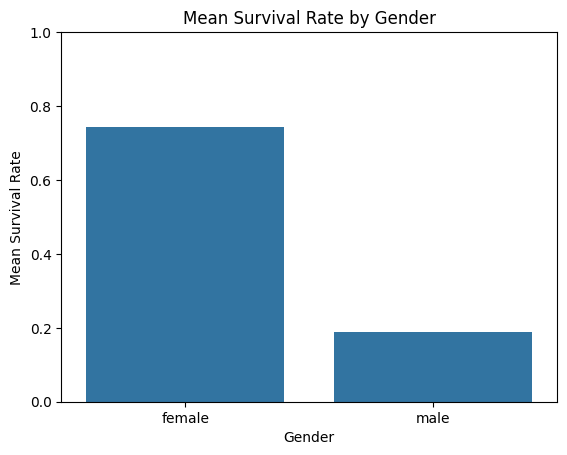

In [ ]:
mean_survialrate = df.groupby('Sex')['Survived'].mean()
print(mean_survialrate)
sns.barplot(x=mean_survialrate.index, y=mean_survialrate.values)
plt.title("Mean Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Mean Survival Rate")
plt.ylim(0, 1)
plt.show()

Problem - 5:
Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).


  Embarked     Sex  Survived
0        C  female  0.876712
1        C    male  0.305263
2        Q  female  0.750000
3        Q    male  0.073171
4        S  female  0.689655
5        S    male  0.174603


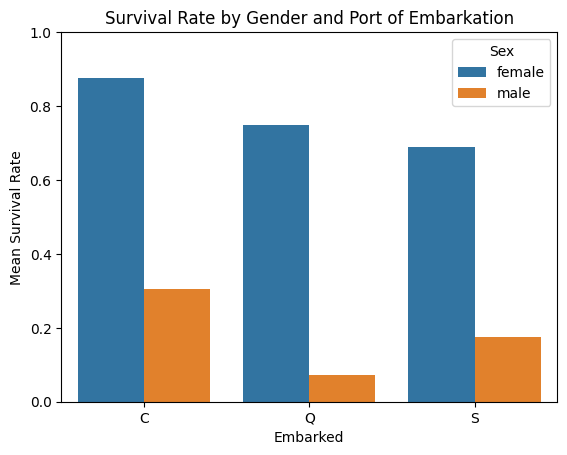

In [ ]:
df = df.dropna(subset=['Embarked'])
mean_survival = df.groupby(['Embarked', 'Sex'])['Survived'].mean().reset_index()
print(mean_survival)
sns.barplot(x='Embarked', y='Survived', hue='Sex', data=mean_survival)
plt.title("Survival Rate by Gender and Port of Embarkation")
plt.ylabel("Mean Survival Rate")
plt.ylim(0, 1)
plt.show()


Problem - 6{Optional}:

Show how the survival rates (’Survived’) vary by age group and passenger class (’Pclass’). Break up the ’Age’ column into five quantiles in your DataFrame, and then compare the means of ’Survived’ by class and age group. Draw a visualization using a any plotting library to represent this graphically.


/tmp/ipython-input-3114874555.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age_pclass = df.groupby(['AgeGroup', 'Pclass'])['Survived'].mean().reset_index()


         AgeGroup  Pclass  Survived
0   (0.419, 19.0]       1  0.809524
1   (0.419, 19.0]       2  0.742857
2   (0.419, 19.0]       3  0.333333
3    (19.0, 25.0]       1  0.761905
4    (19.0, 25.0]       2  0.400000
5    (19.0, 25.0]       3  0.197674
6    (25.0, 31.0]       1  0.666667
7    (25.0, 31.0]       2  0.416667
8    (25.0, 31.0]       3  0.283582
9    (31.0, 41.0]       1  0.772727
10   (31.0, 41.0]       2  0.461538
11   (31.0, 41.0]       3  0.166667
12   (41.0, 80.0]       1  0.500000
13   (41.0, 80.0]       2  0.363636
14   (41.0, 80.0]       3  0.088235


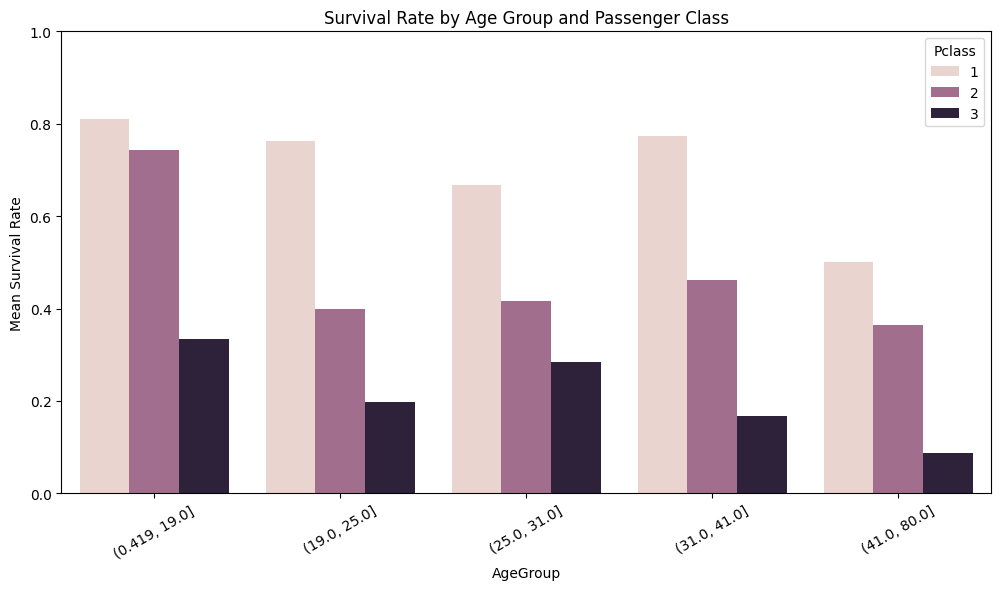

In [ ]:
df = df.dropna(subset=['Age'])
df['AgeGroup'] = pd.qcut(df['Age'], q=5)
survival_by_age_pclass = df.groupby(['AgeGroup', 'Pclass'])['Survived'].mean().reset_index()
print(survival_by_age_pclass)
plt.figure(figsize=(12,6))
sns.barplot(x='AgeGroup', y='Survived', hue='Pclass', data=survival_by_age_pclass)
plt.title("Survival Rate by Age Group and Passenger Class")
plt.ylabel("Mean Survival Rate")
plt.xticks(rotation=30)
plt.ylim(0, 1)
plt.show()